⭐ kütüphanleri yükleyelim

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


⭐ veri setini okutalım

In [2]:
df_ = pd.read_csv("/content/diabetes.csv")

In [3]:
df = df_.copy()

❓ KEŞFEDİCİ VERİ ANALİZİ

 ✔ EDA deki ana fikir varsayimlar yapmadan onceden veriye bakmaktir. Verideki pattern dedigimiz duzen ve kalibi bulmamiz ve sira disi olaylari gozlemlememizin yaninda ayrica degiskenler arasindaki iliskiyi bulmamiza yardim eder.

 ✔  Veri bilimcileri kesfedici veri analizini hem duzen bulmak hem sira disi olaylari kesfetmek hemde degiskler arasindaki iliskiyi bulmak icin kullanirlar. Bunun yani sira bazi is sorularini cevaplayabilirler.

 ✔  kesfedici analizlerle ayrica dogru sorulari sorup sormadigimizi da anlayabiliriz

✔ kesfedici analizler istatistiki bilgileri bulmamiza da yardimci olur, mesela, standard sapma, ortalama deger gibi.

✔ Kesfedici analizler yapildiktan sonra uretilen feature (degisken) ve bilgiler kullanilarak machine learning modelleri uretilebilir

💹 Pregnancies: Hamilelik sayısı

💹 Glucose: Glikoz

💹 BloodPressure: Kan basıncı (Diastolic(Küçük Tansiyon))

💹 SkinThickness: Cilt Kalınlığı

💹 Insulin: İnsülin.

💹 BMI: Beden kitle indeksi.

💹 DiabetesPedigreeFunction: Soyumuzdaki kişilere göre diyabet olma ihtimalimizi hesaplayan bir fonksiyon.

💹 Age: Yaş (yıl)

💹 Outcome: Kişinin diyabet olup olmadığı bilgisi. Hastalığa sahip (1) ya da değil (0)


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# null değerlere ve veri tiplerine bakalım
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.describe([0.10, 0.20, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,10%,20%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.0000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,95.0000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,60.0000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.0000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.0000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,25.9000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.2194,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,23.0000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.0000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


❌  veride boş değer olmaması ve birkaç kolon min değerlerinin 0 olması garip ( bmı ı 0 olan insan yada glucose değerinin sıfır olması ? ))

In [8]:
# outcome değeri int tipinde ama 0 ve 1 olarak 2 kategorik değeri var o yüzden type ı kategorik olarak değiştirelim
df.Outcome.unique()

array([1, 0])

In [9]:
df.Outcome = df.Outcome.astype(str)
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

Text(0, 0.5, 'Frekans')

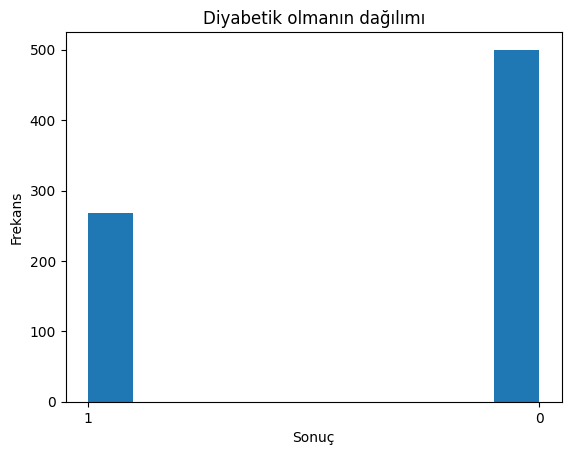

In [10]:
# histogram
plt.hist(df["Outcome"])
plt.title("Diyabetik olmanın dağılımı")
plt.xlabel("Sonuç")
plt.ylabel("Frekans")


In [11]:
df.Outcome.value_counts()  # hangi değerden kaç adet var

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
df.Outcome.value_counts(normalize=True) # benzersiz değerlerin % sayısı

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [13]:
df['Outcome'].value_counts(normalize = True). to_frame().style.format('{:.2%}')

,Outcome
0,65.10%
1,34.90%


<Axes: ylabel='Outcome'>

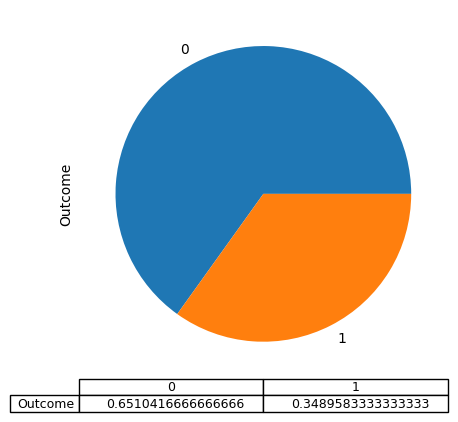

In [14]:
df.Outcome.value_counts(normalize=True).plot(kind='pie', table=True)

<Axes: ylabel='Outcome'>

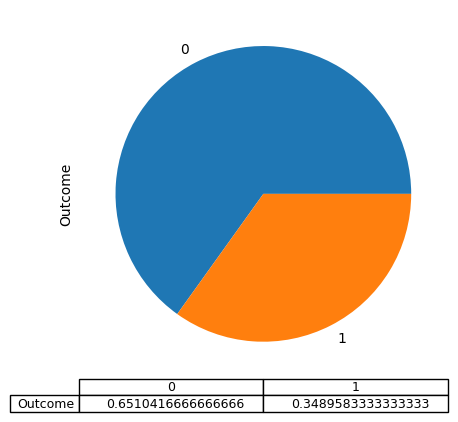

In [15]:
df.Outcome.value_counts(normalize=True).plot(kind='pie', table=True)

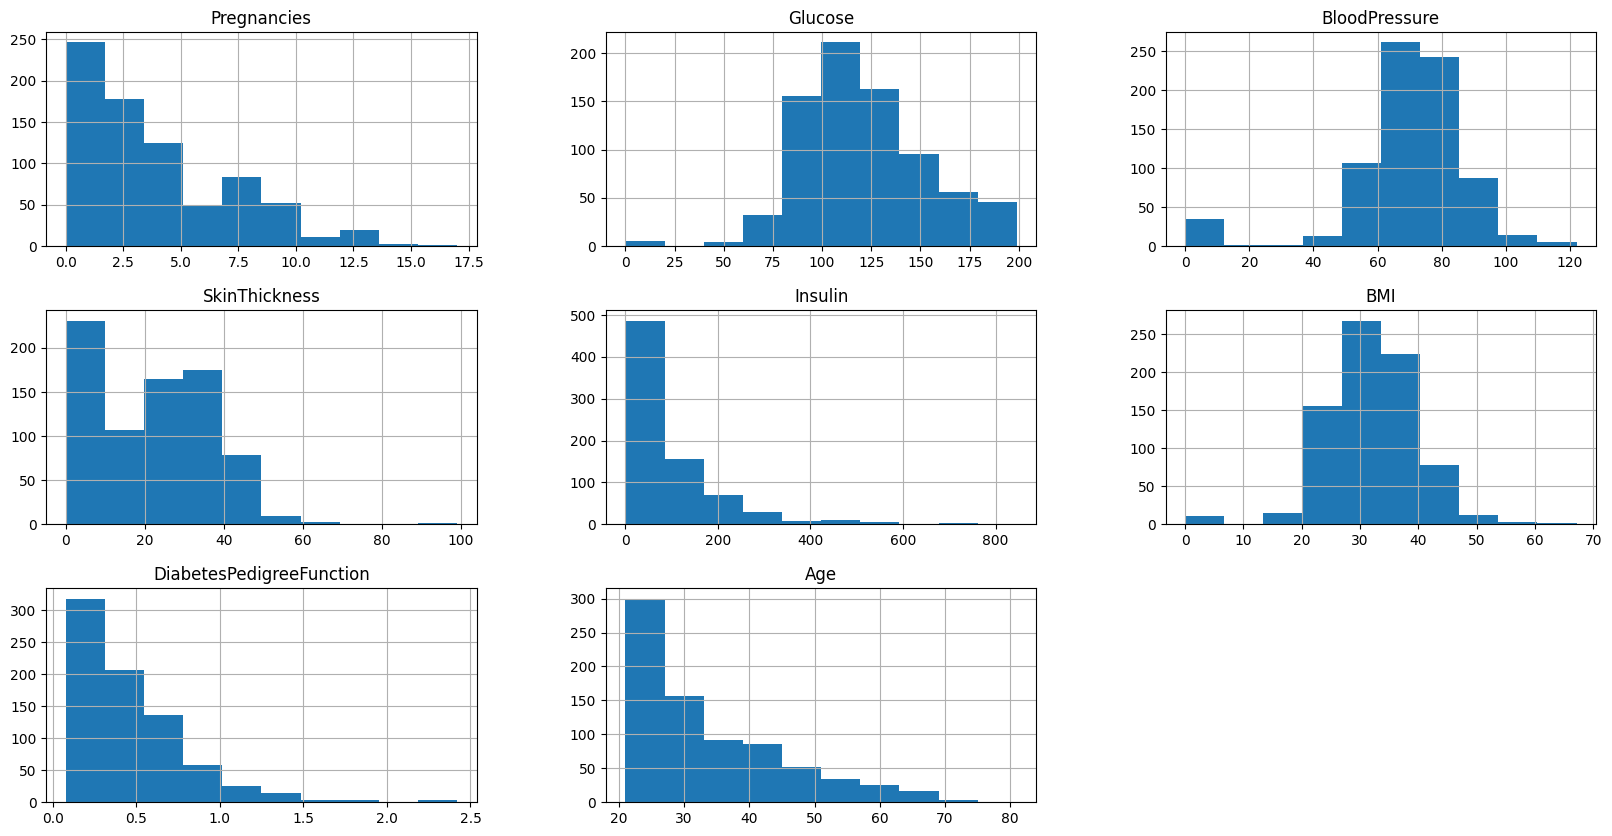

In [16]:
# özellik değerlerinin dağılımlarına bakalım :
df.hist(figsize=(20,10));  # ; olmayınca x ve y ile ilgili bilgiler geliyor

⭐ özellik müh ve veri temizleme

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [18]:
df[df["SkinThickness"] >90]   # sadece 1 değer var ( aykırı değer)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [19]:
# yeni veriyi skinthicness değeri 90 dan küçük olanlar şeklinde güncelleyelim
df = df[df.SkinThickness < 90]

In [20]:
df[df.Pregnancies >15]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


In [21]:
df = df[df.Pregnancies < 15]

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,765.0,3.815686,3.317219,0.000,1.000,3.000,6.000,14.00
Glucose,765.0,120.720261,31.875250,0.000,99.000,117.000,140.000,199.00
BloodPressure,765.0,69.099346,19.393434,0.000,62.000,72.000,80.000,122.00
SkinThickness,765.0,20.392157,15.705834,0.000,0.000,23.000,32.000,63.00
Insulin,765.0,79.819608,115.422143,0.000,0.000,29.000,128.000,846.00
BMI,765.0,31.970719,7.890247,0.000,27.300,32.000,36.500,67.10
DiabetesPedigreeFunction,765.0,0.471707,0.331522,0.078,0.244,0.371,0.626,2.42
Age,765.0,33.172549,11.721195,21.000,24.000,29.000,40.000,81.00


⭐ eksik bilgileri olan kolonları tespit edelim

In [23]:
# muhtemelen eksik değerleri yerine otomatikman 0 değeri atanmış o yüzden "outcome" hariç diğer 0 sahibi kolonları seçelim
eksik_bilgiler = [col for col in df.columns if (df[col].min() == 0 and df[col].dtypes != "O") ]
eksik_bilgiler = [col for col in eksik_bilgiler if "Pregnancies" not in col ]
eksik_bilgiler


['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [24]:
#seçtiğimiz kolonlaedaki 0 değerleri yerine nan değer atalım
df[eksik_bilgiler] = np.where(df[eksik_bilgiler] == 0, np.nan, df[eksik_bilgiler])

In [25]:
# verimize tekrsr bakalım
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               765 non-null    int64  
 1   Glucose                   760 non-null    float64
 2   BloodPressure             730 non-null    float64
 3   SkinThickness             538 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       754 non-null    float64
 6   DiabetesPedigreeFunction  765 non-null    float64
 7   Age                       765 non-null    int64  
 8   Outcome                   765 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 59.8+ KB


In [26]:
# verimizde boş değer var mı yok mu daha net öğrenelim
df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

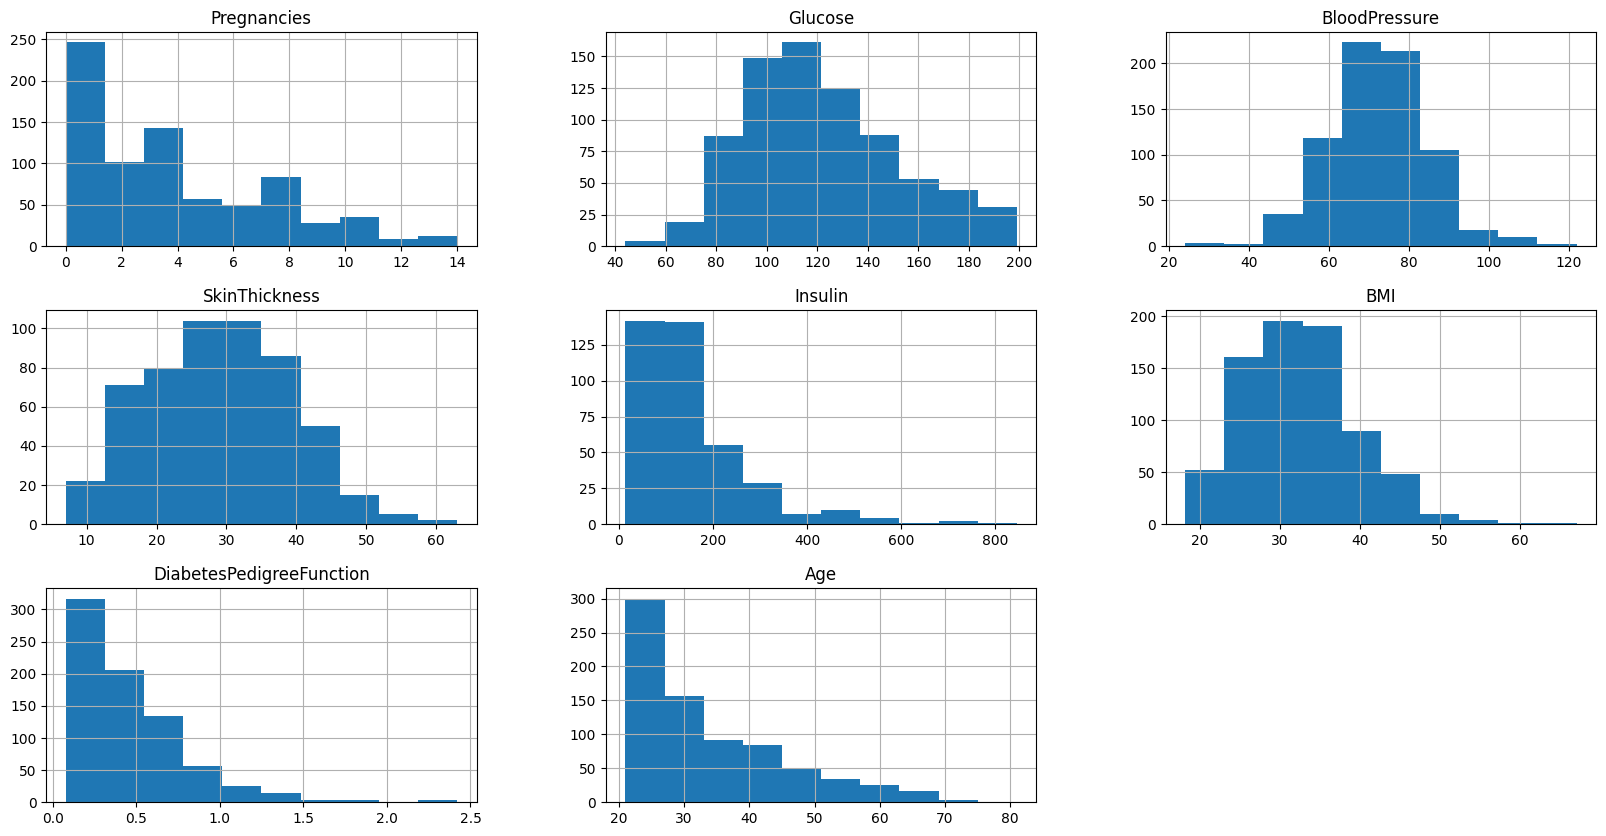

In [27]:
df.hist(figsize=(20,10));

<Axes: >

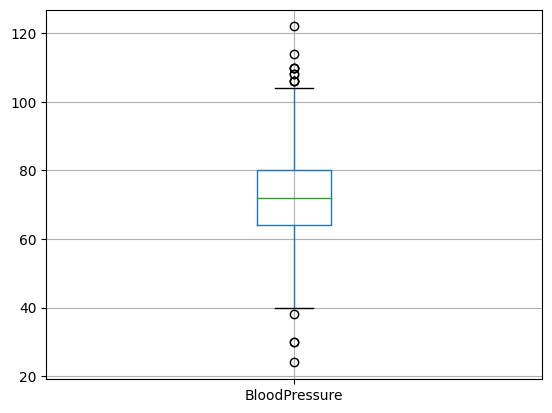

In [28]:
df.boxplot(["BloodPressure"])

In [29]:
df_yari_temiz = df.fillna(df.median()) # boş değerleri ilgili sütunun medyanı ile dolduralım

In [30]:
df_yari_temiz.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [31]:
# yaşı kendi içinde kategorilere bölelim
df['age_bins'] = pd.cut(x=df["Age"], bins=[20,30,40,50,60,70,80,90])

In [32]:
df['age_bins'] = df['age_bins'].astype(str)

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"


In [34]:
df_temiz = df.fillna(df.groupby(['Pregnancies', 'Outcome', 'age_bins']).transform('median'))

In [35]:
df_temiz.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [36]:
df.groupby(['Outcome', 'age_bins', 'Pregnancies']).count()

Glucose  BloodPressure  SkinThickness  Insulin  \
Outcome age_bins Pregnancies                                                   
0       (20, 30] 0                 61             58             47       35   
                 1                 93             96             87       68   
                 2                 76             72             62       49   
                 3                 37             35             29       23   
                 4                 28             28             19       14   
...                               ...            ...            ...      ...   
1       (50, 60] 12                 1              1              1        1   
        (60, 70] 0                  1              1              0        0   
                 2                  1              1              0        0   
                 4                  3              3              1        0   
                 6                  1              1              0        0   

                              BMI  DiabetesPedigreeFunction  Age  
Outcome age_bins Pregnancies                                      
0       (20, 30] 0             58                        61   61  
                 1             96                        96   96  
                 2             74                        76   76  
                 3             36                        37   37  
                 4             28                        28   28  
...                           ...                       ...  ...  
1       (50, 60] 12             1                         1    1  
        (60, 70] 0              1                         1    1  
                 2              1                         1    1  
                 4              3                         3    3  
                 6              1                         1    1  

[115 rows x 7 columns]

In [37]:
# yaş altı hamilelik sayısını azalan şekilde sıralayalım
df[df["Age"] < 25].sort_values(by="Pregnancies", ascending=False)[0:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
731,8,120.0,86.0,NaN,NaN,28.4,0.259,22,1,"(20, 30]"
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0,"(20, 30]"
121,6,111.0,64.0,39.0,NaN,34.2,0.260,24,0,"(20, 30]"
98,6,93.0,50.0,30.0,64.0,28.7,0.356,23,0,"(20, 30]"
457,5,86.0,68.0,28.0,71.0,30.2,0.364,24,0,"(20, 30]"
442,4,117.0,64.0,27.0,120.0,33.2,0.230,24,0,"(20, 30]"
230,4,142.0,86.0,NaN,NaN,44.0,0.645,22,1,"(20, 30]"
629,4,94.0,65.0,22.0,NaN,24.7,0.148,21,0,"(20, 30]"
241,4,91.0,70.0,32.0,88.0,33.1,0.446,22,0,"(20, 30]"
641,4,128.0,70.0,NaN,NaN,34.3,0.303,24,0,"(20, 30]"


In [38]:
# age_bins ve outcome i kendi medyanları ile değiştirelim

df_temiz = df_temiz.fillna(df_temiz.groupby(['Outcome', 'age_bins']).transform('median'))

In [39]:
df_temiz.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,765.0,3.815686,3.317219,0.000,1.000,3.000,6.000,14.00
Glucose,765.0,121.481699,30.358024,44.000,99.000,117.000,140.000,199.00
BloodPressure,764.0,72.400524,12.206042,24.000,64.000,72.000,80.000,122.00
SkinThickness,764.0,29.047120,8.966978,7.000,23.000,29.000,35.000,63.00
Insulin,758.0,149.141161,99.073541,14.000,88.000,122.000,177.500,846.00
BMI,765.0,32.421307,6.883376,18.200,27.500,32.100,36.500,67.10
DiabetesPedigreeFunction,765.0,0.471707,0.331522,0.078,0.244,0.371,0.626,2.42
Age,765.0,33.172549,11.721195,21.000,24.000,29.000,40.000,81.00


In [40]:
df_temiz.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [41]:
# Outcome değerine göre diğer kolonlarrın na değerlerini medyanı ile doldur
df_temiz = df_temiz.fillna(df_temiz.groupby(['Outcome']).transform('median'))

In [42]:
df_temiz.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,765.0,3.815686,3.317219,0.000,1.000,3.000,6.000,14.00
Glucose,765.0,121.481699,30.358024,44.000,99.000,117.000,140.000,199.00
BloodPressure,765.0,72.397386,12.198360,24.000,64.000,72.000,80.000,122.00
SkinThickness,765.0,29.044444,8.961413,7.000,23.000,29.000,35.000,63.00
Insulin,765.0,149.240523,98.651920,14.000,88.000,122.000,176.000,846.00
BMI,765.0,32.421307,6.883376,18.200,27.500,32.100,36.500,67.10
DiabetesPedigreeFunction,765.0,0.471707,0.331522,0.078,0.244,0.371,0.626,2.42
Age,765.0,33.172549,11.721195,21.000,24.000,29.000,40.000,81.00


In [43]:
df_corr = df_temiz.copy()

In [44]:
df_corr['Outcome'] = df_corr['Outcome'].astype(int)

In [45]:
df_corr.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
age_bins                     object
dtype: object

In [46]:
df_corr.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125841,0.217565,0.108548,0.091245,0.013672,-0.035114,0.548930,0.214506
Glucose,0.125841,1.000000,0.228163,0.188185,0.491978,0.233472,0.137409,0.261291,0.492232
BloodPressure,0.217565,0.228163,1.000000,0.193776,0.106777,0.289215,0.000385,0.334995,0.168725
SkinThickness,0.108548,0.188185,0.193776,1.000000,0.205479,0.542304,0.098242,0.132140,0.250845
Insulin,0.091245,0.491978,0.106777,0.205479,1.000000,0.198760,0.124959,0.250889,0.369187
BMI,0.013672,0.233472,0.289215,0.542304,0.198760,1.000000,0.154425,0.023565,0.311769
DiabetesPedigreeFunction,-0.035114,0.137409,0.000385,0.098242,0.124959,0.154425,1.000000,0.032232,0.174023
Age,0.548930,0.261291,0.334995,0.132140,0.250889,0.023565,0.032232,1.000000,0.232487
Outcome,0.214506,0.492232,0.168725,0.250845,0.369187,0.311769,0.174023,0.232487,1.000000


<Axes: >

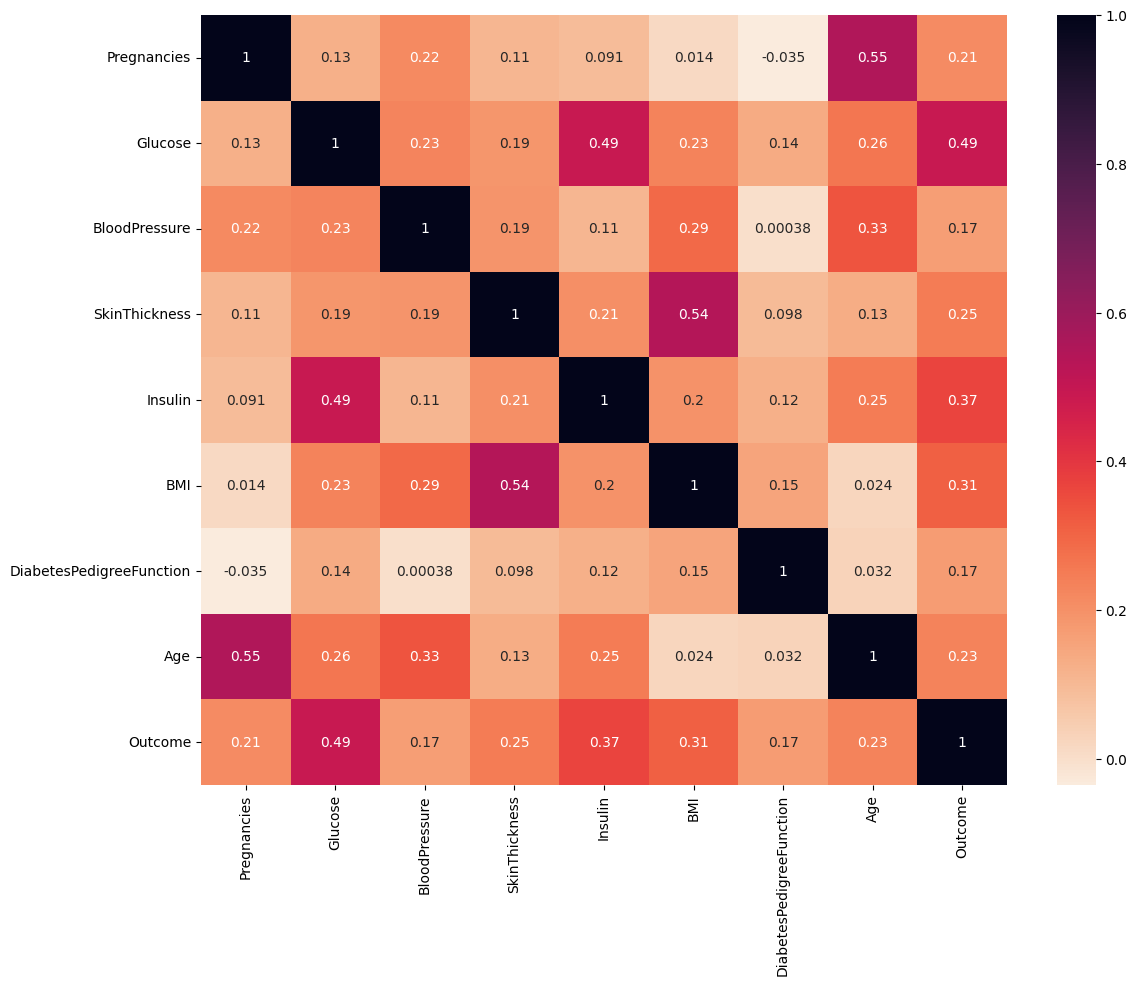

In [47]:
plt.figure(figsize=(13,10))
cmap = sns.color_palette('rocket_r', as_cmap=True)
sns.heatmap(df_corr.corr(), cmap=cmap, annot=True)

⭐ VERİ GÖRSELLEŞTİRME

In [49]:
df_temiz.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"


In [50]:
df_temiz.reset_index(inplace=True)
df_temiz.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"


Text(0, 0.5, 'Insulin level')

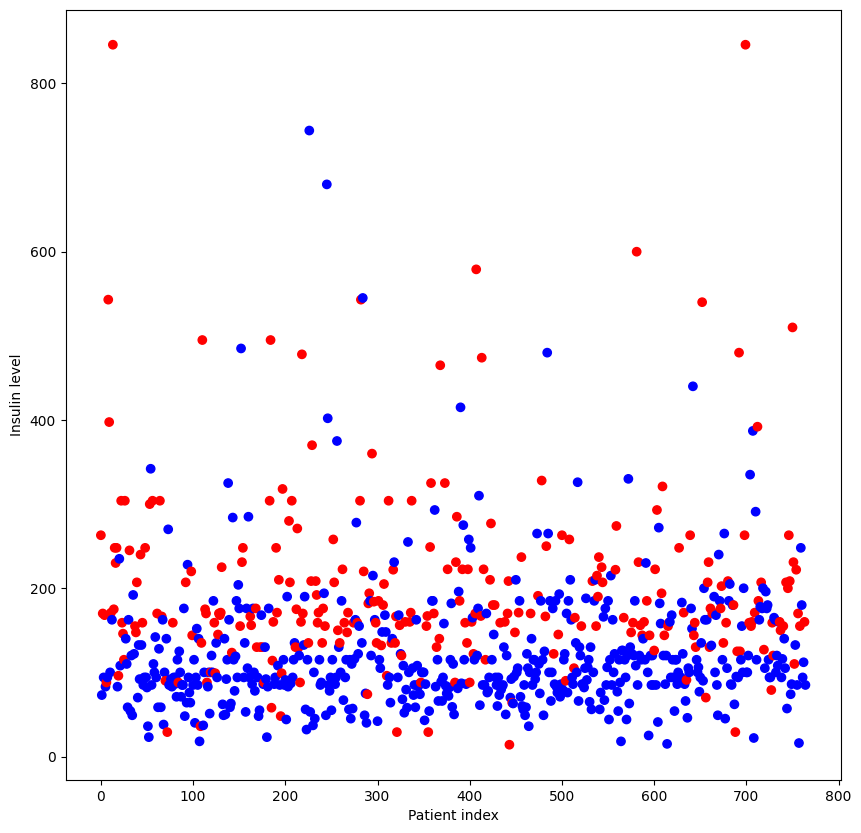

In [56]:
# DF_TEMİZ İÇİN ;
colors ={"0":'blue', "1":'red'}
plt.figure(figsize=(10,10))
plt.scatter(df_temiz.index,df_temiz.Insulin, c=df_temiz['Outcome'].map(colors))
plt.xlabel('Patient index')
plt.ylabel('Insulin level')

# insilün seviyesinin azaldığı yerlerde mavi ( diyabet olamama) yoğunlukta

In [57]:
df_yari_temiz.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

Text(0, 0.5, 'Insulin level')

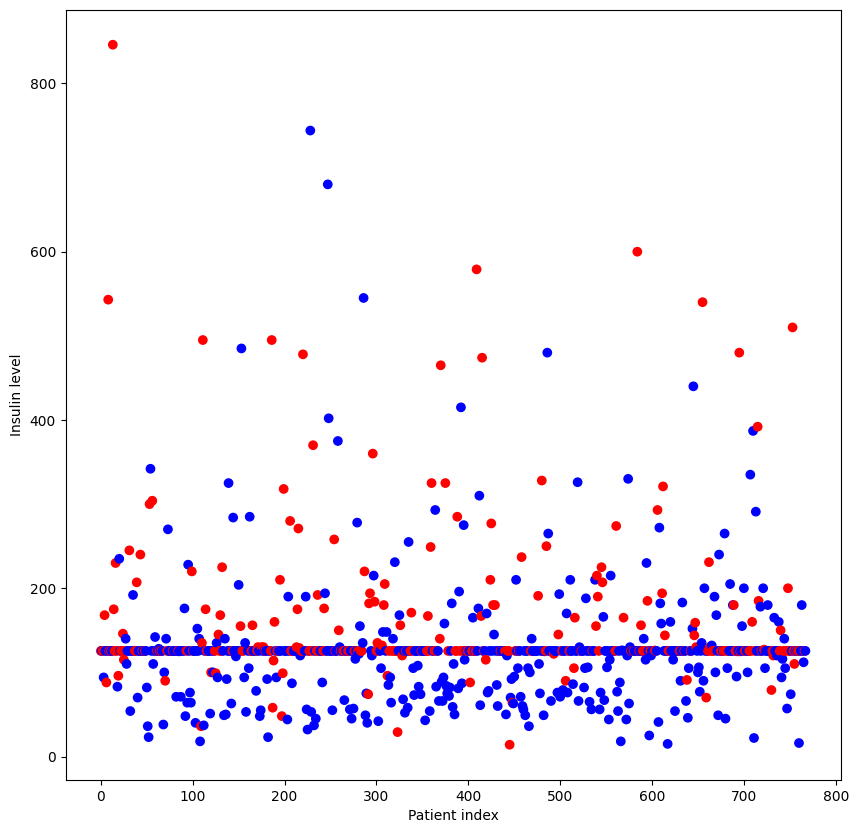

In [58]:
# DF_yarı_TEMİZ İÇİN ;
colors ={"0":'blue', "1":'red'}
plt.figure(figsize=(10,10))
plt.scatter(df_yari_temiz.index,df_yari_temiz.Insulin, c=df_temiz['Outcome'].map(colors))
plt.xlabel('Patient index')
plt.ylabel('Insulin level')

# grafikte de yarı_temizde problem olduğu bariz

In [59]:
df_temiz.reset_index(drop=False, inplace=True)
df_temiz


,level_0,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,0,0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,2,2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...
760,760,763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
761,761,764,2,122.0,70.0,27.0,94.0,36.8,0.340,27,0,"(20, 30]"
762,762,765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"
763,763,766,1,126.0,60.0,28.5,160.0,30.1,0.349,47,1,"(40, 50]"


In [60]:
px.scatter(df_temiz, x='index', y='Insulin', color='Outcome', color_discrete_sequence=['red', 'blue'])
# interaktif kullanmak için bu grafik gayet iyi

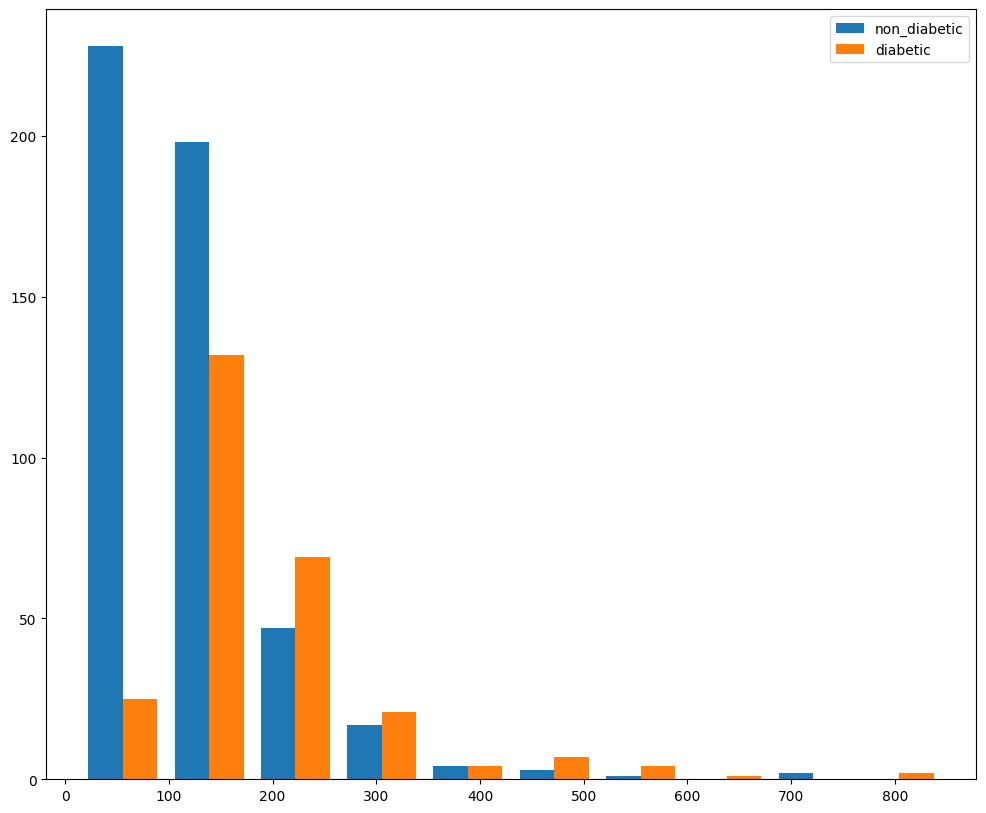

In [61]:
# diyabet olanlarla - olmayanların insülin sayılarının kıyaslanması
plt.figure(figsize=(12,10))
df_diabetic = df_temiz.loc[df_temiz.Outcome =='1'];
df_non_diabetic = df_temiz.loc[df_temiz.Outcome =='0'];
labels=['non_diabetic', 'diabetic'];
plt.hist([df_non_diabetic['Insulin'], df_diabetic['Insulin']], label=labels);
plt.legend()